# 06 - Création du dataset des données de jobs et de job_events fusionnées

Ce notebook génère 1 csv :

- merge_raw_jobs_and_clean_jobevents_dataset.csv

Etapes :

- Suppression des colonnes doublon dans les 2 datasets

- Fusion des datasets

# A. Imports

## a) Librairies

In [2]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## b) Données

In [3]:
# source path
jobs = '../data/jobs/raw_jobs_dataset.csv'

# source path
events = '../data/jobs/clean_merge_job_events_dataset.csv'

# save target path
save_csv = '../data/jobs/merge_raw_jobs_and_clean_jobevents_dataset.csv'

# B. Dataframe

## a) Création des dataframes jobs et events

### 1. jobs

In [4]:
# création d'un dataframe à partir du csv de données
jobs_df = pd.read_csv(jobs, index_col=0)
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30399 entries, 0 to 30398
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_copies                  30399 non-null  int64  
 1   started_at                    30399 non-null  object 
 2   ended_at                      30399 non-null  object 
 3   speed                         30399 non-null  int64  
 4   operator                      30399 non-null  object 
 5   operator_level                30399 non-null  object 
 6   paperHeight                   30399 non-null  int64  
 7   paperWidth                    30399 non-null  int64  
 8   paperName                     30399 non-null  object 
 9   paperThickness                30399 non-null  int64  
 10  id_on_machine                 30399 non-null  int64  
 11  total_copies_requested        30399 non-null  int64  
 12  uses_ifoil                    30399 non-null  bool   
 13  u

### 2. job events

In [5]:
# création d'un dataframe à partir du csv de données
events_df = pd.read_csv(events, index_col=0)
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30399 entries, 0 to 30398
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   jobId                                                 30399 non-null  int64  
 1   timestamp_start                                       30399 non-null  object 
 2   totalCopies_start                                     30399 non-null  int64  
 3   jsonVersion_x                                         10908 non-null  float64
 4   LED_iper                                              30399 non-null  int64  
 5   bars_iper                                             30399 non-null  object 
 6   drops_iper                                            30399 non-null  int64  
 7   dithering_iper                                        30399 non-null  bool   
 8   deadPixelsOffset_iper                                 30

## b) Création d'un dataframe fusionné

### 1. Suppression de colonnes

In [6]:
# suppression des colonnes avec des valeurs uniques
for col in list(jobs_df.columns):
    if jobs_df[col].nunique() == 1:
        jobs_df.drop(col, axis=1, inplace=True)

In [7]:
# suppression des colonnes avec des valeurs uniques
for col in list(events_df.columns) :
    if events_df[col].nunique() == 1:
        events_df.drop(col, axis=1, inplace=True)

### 2. Concordance des colonnes entre dataframes

In [8]:
# on renomme des colonnes de jobs
jobs_df = jobs_df.rename(columns={
 'uses_ifoil' : 'ifoil',
 'iper_bvar_count': 'bars'
 })

In [9]:
# on renomme des colonnes de events
events_df = events_df.rename(columns={
    'totalCopies_start':'total_copies_requested',
    'LED_iper' : 'LED',
    'bars_iper' : 'bars',
    'drops_iper': 'drops',
    'dithering_iper' : 'dithering',
    'deadPixelsOffset_iper' : 'deadPixelsOffset',
    'level_user' : 'operator_level',
    'operator_user':'operator',
    'enabled_ifoil' : 'ifoil',
    'x_imageLayout_layout' : 'x_imageLayout',
    'y_imageLayout_layout' : 'y_imageLayout',
    'name_paperFormat_layout' : 'paperName',
    'width_paperFormat_layout' : 'paperWidth',
    'height_paperFormat_layout' : 'paperHeight',
    'speed_layout' : 'speed',
    'topMargin_registration_remoteScannerRegistration' : 'topMargin_remoteScannerRegistration',
    'leftMargin_registration_remoteScannerRegistration' : 'leftMargin_remoteScannerRegistration',
    'totalCopies_end' : 'total_copies',
    'consumption_operatorSideTanks_varnishConsumption' : 'varnishConsumptionVarnish_3d'
    })

In [10]:
# Comparer les valeurs de la colonne "bars" entre les dataframes "events_df" et "jobs_df"
events_df['bars'].isin(jobs_df['bars']).any()

False

In [11]:
# liste des colonnes communes
common_cols = [col for col in jobs_df.columns.to_list() if col in events_df.columns.to_list()]

### 3. Concordance des valeurs entre colonnes communes

In [12]:
jobs_df.shape

(30399, 18)

In [13]:
events_df.shape

(30399, 37)

In [14]:
events_df.columns

Index(['jobId', 'timestamp_start', 'total_copies_requested', 'LED', 'bars',
       'drops', 'dithering', 'deadPixelsOffset', 'operator_level', 'operator',
       'speed_ifoil', 'ifoil', 'optifoil_ifoil', 'stampAreas_ifoil',
       'heater1Enabled_ifoil', 'speedTensionIn_ifoil',
       'heater1Temperature_ifoil', 'x_imageLayout', 'y_imageLayout',
       'paperName', 'paperWidth', 'paperHeight', 'speed', 'power_irDryers',
       'power_uvDryers', 'topMargin_remoteScannerRegistration',
       'leftMargin_remoteScannerRegistration',
       'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'redScore_fullScannerMode_remoteScannerRegistration',
       'blueScore_fullScannerMode_remoteScannerRegistration',
       'greenScore_fullScannerMode_remoteScannerRegistration',
       'mode_remoteScannerRegistration', 'jobState', 'timestamp_end',
       'total_copies', 'varnishConsumptionVarnish_3d'],
      dtype='object')

In [13]:
jobs_df.head()

,total_copies,started_at,ended_at,speed,operator,operator_level,paperHeight,paperWidth,paperName,id_on_machine,total_copies_requested,ifoil,scanner_mode,bars,varnishConsumptionVarnish_3d,run,total_run,copies_per_run
0,0,2021-06-18 09:22:46.866000+00:00,2021-06-18 09:22:46.866000+00:00,418,Distributor,Distributor,520,740,UNDEFINED,1624008166,3,False,0,0,0.0,0,0,0
1,3,2021-06-18 10:08:13.716000+00:00,2021-06-18 10:10:22.257000+00:00,313,Micka,Operator,740,520,UNDEFINED,1624010893,100,False,0,0,0.0,0,0,0
2,70,2021-06-18 10:11:52.165000+00:00,2021-06-18 10:18:20.294000+00:00,313,Micka,Operator,740,520,UNDEFINED,1624011111,100,False,0,0,0.0,0,0,0
3,0,2021-06-18 10:30:23.049000+00:00,2021-06-18 10:30:23.049000+00:00,700,Micka,Operator,450,320,UNDEFINED,1624012222,50,False,0,0,0.0,0,0,0
4,0,2021-06-18 12:35:11.864000+00:00,2021-06-18 12:35:11.864000+00:00,700,Viktor,Operator,450,320,UNDEFINED,1624019711,1,False,0,0,0.0,0,0,0


In [14]:
events_df.head()

,jobId,timestamp_start,total_copies_requested,LED,bars,drops,dithering,deadPixelsOffset,operator_level,operator,...,redScore_gridMode_remoteScannerRegistration,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d
0,1624008166,2021-06-18 09:22:46.866189200+00:00,3,10,"[1, 2]",3,False,0,Distributor,Distributor,...,1500,1500,1500,16,16,1,UNDEFINED,2021-06-18 09:22:46.866189200+00:00,0,0.000000
1,1624010893,2021-06-18 10:08:13.716973900+00:00,100,30,"[1, 2]",4,False,0,Operator,Micka,...,1500,1500,1500,16,10,1,ERROR,2021-06-18 10:10:22.257077800+00:00,3,1.440239
2,1624011111,2021-06-18 10:11:52.165952600+00:00,100,30,"[1, 2]",4,False,0,Operator,Micka,...,1500,1500,1500,16,10,1,CANCELED,2021-06-18 10:18:20.294592300+00:00,70,33.607494
3,1624012222,2021-06-18 10:30:23.049649100+00:00,50,10,[2],1,False,0,Operator,Micka,...,1500,1500,1500,16,10,1,UNDEFINED,2021-06-18 10:30:23.049649100+00:00,0,0.000000
4,1624019711,2021-06-18 12:35:11.864117300+00:00,1,10,[2],1,False,0,Operator,Viktor,...,1500,1500,1500,16,16,1,UNDEFINED,2021-06-18 12:35:11.864117300+00:00,0,0.000000


In [15]:
events_df.shape

(30399, 37)

In [16]:
jobs_df.shape

(30399, 18)

In [49]:
# on liste les colonnes des deux dataframes contenant toutes leurs valeurs identiques
col_with_duplicates = []
for col in common_cols :
    if (events_df[col].values == jobs_df[col].values).all():
        col_with_duplicates.append(col)
col_with_duplicates

['total_copies',
 'speed',
 'operator',
 'operator_level',
 'paperName',
 'total_copies_requested',
 'ifoil']

In [50]:
# suppression des colonnes de jobs en doublons dans events
jobs_df = jobs_df.drop(col_with_duplicates, axis=1)

### 4. Fusion des dataframes

In [51]:
merge_df = pd.merge(jobs_df, events_df, left_on='id_on_machine', right_on='jobId', suffixes=['_job', '_event'])
merge_df = merge_df.drop('id_on_machine', axis=1)

### 5. Vérification

In [52]:
# on verifie que les jobId sont uniques
merge_df.jobId.duplicated().any()

False

In [53]:
# id temoin
check_jobid = 1624008166
# détail de la ligne témoin dans chaque dataset
jobs_check_line = jobs_df[jobs_df.id_on_machine == check_jobid]
events_check_line = events_df[events_df.jobId == check_jobid]
merge_check_line = merge_df[merge_df.jobId == check_jobid]

In [54]:
jobs_check_line

,started_at,ended_at,paperHeight,paperWidth,id_on_machine,scanner_mode,bars,varnishConsumptionVarnish_3d,run,total_run,copies_per_run
0,2021-06-18 09:22:46.866000+00:00,2021-06-18 09:22:46.866000+00:00,520,740,1624008166,0,0,0.0,0,0,0


In [55]:
events_check_line

,jobId,timestamp_start,total_copies_requested,LED,bars,drops,dithering,deadPixelsOffset,operator_level,operator,...,redScore_gridMode_remoteScannerRegistration,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d
0,1624008166,2021-06-18 09:22:46.866189200+00:00,3,10,"[1, 2]",3,False,0,Distributor,Distributor,...,1500,1500,1500,16,16,1,UNDEFINED,2021-06-18 09:22:46.866189200+00:00,0,0.0


In [56]:
merge_check_line

,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,varnishConsumptionVarnish_3d_job,run,total_run,copies_per_run,...,redScore_gridMode_remoteScannerRegistration,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,total_copies,varnishConsumptionVarnish_3d_event
0,2021-06-18 09:22:46.866000+00:00,2021-06-18 09:22:46.866000+00:00,520,740,0,0,0.0,0,0,0,...,1500,1500,1500,16,16,1,UNDEFINED,2021-06-18 09:22:46.866189200+00:00,0,0.0


In [57]:
# on conserve les colonnes started_at et ended_at
for index, row in merge_df.iterrows():
    # on verifie que started_at à le datetime le plus petit
    if row.timestamp_start < row.started_at :
        row.started_at = row.timestamp_start
    # on verifie que ended_at à le datetime le plus grand
    if row.timestamp_end > row.ended_at :
        row.ended_at = row.timestamp_end

In [58]:
merge_df = merge_df.drop(['timestamp_start','timestamp_end'], axis=1)

In [59]:
# # conversion des colonnes contenant des valeurs de temsps au format datetime
# jobs_df['started_at'] = pd.to_datetime(jobs_df['started_at'], utc=True)
# jobs_df['ended_at'] = pd.to_datetime(jobs_df['ended_at'], utc=True)
# events_df['timestamp_start'] = pd.to_datetime(events_df['timestamp_start'], utc=True)
# events_df['timestamp_end'] = pd.to_datetime(events_df['timestamp_end'], utc=True)

### 6. Output csv

In [60]:
# sauvegarde du dataset en csv
merge_df.to_csv(save_csv)

In [61]:
merge_df.head(3)

,started_at,ended_at,paperHeight_job,paperWidth_job,scanner_mode,bars_job,varnishConsumptionVarnish_3d_job,run,total_run,copies_per_run,...,leftMargin_remoteScannerRegistration,redScore_gridMode_remoteScannerRegistration,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,total_copies,varnishConsumptionVarnish_3d_event
0,2021-06-18 09:22:46.866000+00:00,2021-06-18 09:22:46.866000+00:00,520,740,0,0,0.0,0,0,0,...,0,1500,1500,1500,16,16,1,UNDEFINED,0,0.000000
1,2021-06-18 10:08:13.716000+00:00,2021-06-18 10:10:22.257000+00:00,740,520,0,0,0.0,0,0,0,...,0,1500,1500,1500,16,10,1,ERROR,3,1.440239
2,2021-06-18 10:11:52.165000+00:00,2021-06-18 10:18:20.294000+00:00,740,520,0,0,0.0,0,0,0,...,0,1500,1500,1500,16,10,1,CANCELED,70,33.607494


In [62]:
for col in merge_df.columns:
    unique_values = merge_df[col].nunique()
    print(f"Column {col} has {unique_values} unique values.")


Column started_at has 30399 unique values.
Column ended_at has 30399 unique values.
Column paperHeight_job has 19 unique values.
Column paperWidth_job has 18 unique values.
Column scanner_mode has 3 unique values.
Column bars_job has 3 unique values.
Column varnishConsumptionVarnish_3d_job has 26065 unique values.
Column run has 2 unique values.
Column total_run has 2 unique values.
Column copies_per_run has 306 unique values.
Column jobId has 30399 unique values.
Column total_copies_requested has 301 unique values.
Column LED has 39 unique values.
Column bars_event has 3 unique values.
Column drops has 12 unique values.
Column dithering has 2 unique values.
Column deadPixelsOffset has 4 unique values.
Column operator_level has 2 unique values.
Column operator has 4 unique values.
Column speed_ifoil has 76 unique values.
Column ifoil has 2 unique values.
Column optifoil_ifoil has 2 unique values.
Column stampAreas_ifoil has 26 unique values.
Column heater1Enabled_ifoil has 2 unique val

In [63]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30399 entries, 0 to 30398
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   started_at                                            30399 non-null  object 
 1   ended_at                                              30399 non-null  object 
 2   paperHeight_job                                       30399 non-null  int64  
 3   paperWidth_job                                        30399 non-null  int64  
 4   scanner_mode                                          30399 non-null  int64  
 5   bars_job                                              30399 non-null  int64  
 6   varnishConsumptionVarnish_3d_job                      30399 non-null  float64
 7   run                                                   30399 non-null  int64  
 8   total_run                                             30

# C. Visualisation

In [64]:
df = merge_df.copy()

In [65]:
df.jobState.unique()

array(['UNDEFINED', 'ERROR', 'CANCELED', 'SUCCESS'], dtype=object)

In [66]:
# on remplace dans le dataframe les valeurs du type 'str' avec un code
criticality = {'UNDEFINED': 0, 'SUCCESS': 1, 'CANCELED': 2, 'ERROR':3}
df.jobState.replace(criticality, inplace=True)
df.jobState = pd.to_numeric(df.jobState).astype('int64')

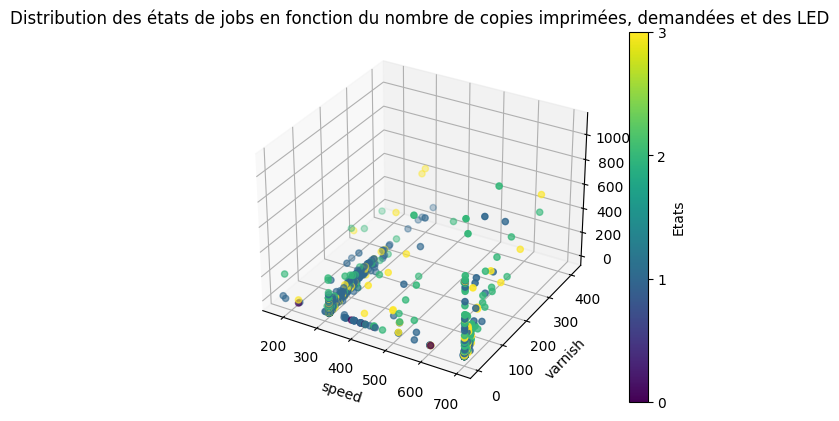

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
x = df['speed'][:1000]
y = df['varnishConsumptionVarnish_3d_job'][:1000]
z = df[['total_copies']][:1000]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
c = df[['jobState']][:1000]
scatter = ax.scatter(x, y, z, c=c, cmap='viridis')

# Customize the plot
ax.set_xlabel('speed')
ax.set_ylabel('varnish')
ax.set_zlabel('printed')
ax.set_title('Distribution des états de jobs en fonction du nombre de copies imprimées, demandées et des LED')

# Add colorbar with precise tick labels
cbar = fig.colorbar(scatter, ticks=np.linspace(min(c.jobState), max(c.jobState), num=4))
cbar.set_label('Etats')

# Show the plot
plt.show()

In [68]:
min(c.jobState)

0